In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pickle

In [2]:
#Reading datas

audi = pd.read_csv('../dataset/audi.csv')
bmw = pd.read_csv('../dataset/bmw.csv')
ford = pd.read_csv('../dataset/ford.csv')
mercedes = pd.read_csv('../dataset/merc.csv')
skoda = pd.read_csv('../dataset/skoda.csv')
toyota = pd.read_csv('../dataset/toyota.csv')
vw = pd.read_csv('../dataset/vw.csv')


In [3]:
#Creating 'brand' column for brand feature.

audi['brand'] = 'Audi'
bmw['brand'] = 'BMW'
ford['brand'] = 'Ford'
mercedes['brand'] = 'Mercedes'
skoda['brand'] = 'Skoda'
toyota['brand'] = 'Toyota'
vw['brand'] = 'Volkswagen'

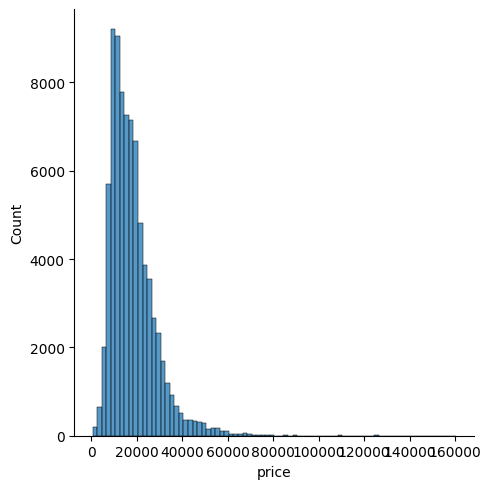

In [4]:
#Concatenation datas into a dataframe and dropping the 'tax' column because we do not use this feature

whole_dataset = pd.concat([audi,bmw,ford,mercedes,skoda,toyota,vw])
whole_dataset.drop(columns=['tax'], axis=1, inplace=True)

#Plotting the price distribution

sns.displot(whole_dataset['price'], binwidth=2000)

In [5]:
#Rearrange column order

column_names = ['brand','model','mileage','transmission','fuelType','mpg','engineSize','price']
whole_dataset = whole_dataset.reindex(columns = column_names)

#Setting a threshold for a specific price value to clean outlier datas
whole_dataset = whole_dataset[whole_dataset['price'] < 50000]
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,Audi,A1,15735,Manual,Petrol,55.4,1.4,12500
1,Audi,A6,36203,Automatic,Diesel,64.2,2.0,16500
2,Audi,A1,29946,Manual,Petrol,55.4,1.4,11000
3,Audi,A4,25952,Automatic,Diesel,67.3,2.0,16800
4,Audi,A3,1998,Manual,Petrol,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,Volkswagen,Eos,74000,Manual,Diesel,58.9,2.0,5990
15153,Volkswagen,Fox,88102,Manual,Petrol,46.3,1.2,1799
15154,Volkswagen,Fox,70000,Manual,Petrol,42.0,1.4,1590
15155,Volkswagen,Fox,82704,Manual,Petrol,46.3,1.2,1250


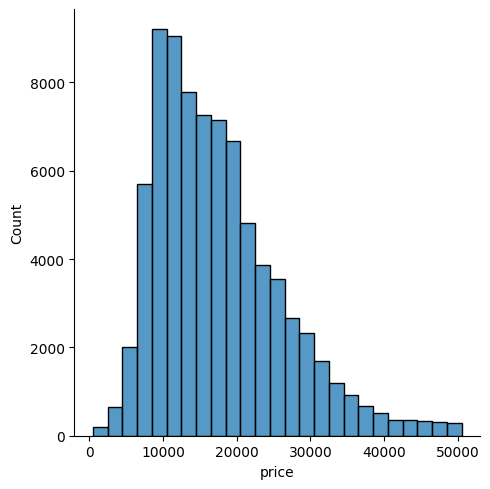

In [6]:
#Plotting price distribution again after setting the threshold

sns.displot(whole_dataset['price'], binwidth=2000)

In [7]:
#Getting counts of every brand to see how much of every brand's car

brands = whole_dataset['brand'].unique()
brand_count = []
for j in brands:
    print(j)
    print(whole_dataset['brand'].value_counts()[j])
    brand_count.append(whole_dataset['brand'].value_counts()[j])

brand_count

Audi
10342
BMW
10418
Ford
17964
Mercedes
12703
Skoda
6266
Toyota
6727
Volkswagen
15117


[10342, 10418, 17964, 12703, 6266, 6727, 15117]

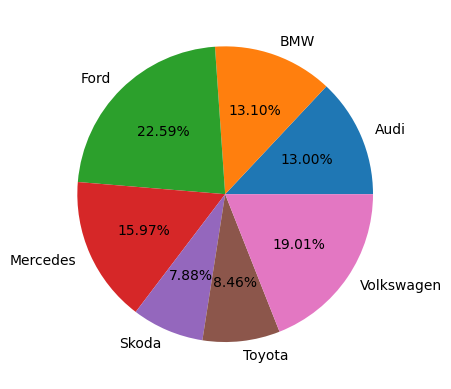

In [8]:
plt.pie(brand_count,labels=brands,autopct='%1.2f%%')
plt.show()

In [9]:
#Initializing label encoders

lenc1 = preprocessing.LabelEncoder()
lenc2 = preprocessing.LabelEncoder()
lenc3 = preprocessing.LabelEncoder()
lenc4 = preprocessing.LabelEncoder()

# Assigning numerical values and storing it in another columns

whole_dataset['brand'] = lenc1.fit_transform(whole_dataset['brand'])
whole_dataset['model'] = lenc2.fit_transform(whole_dataset['model'])
whole_dataset['transmission'] = lenc3.fit_transform(whole_dataset['transmission'])
whole_dataset['fuelType'] = lenc4.fit_transform(whole_dataset['fuelType'])

In [10]:
#Creating dictionaries

brand_dict = {}

for i in range(len(lenc1.classes_)):
    brand_dict[lenc1.classes_[i]] = i
print(brand_dict)

model_dict = {}

for i in range(len(lenc2.classes_)):
    model_dict[lenc2.classes_[i]] = i
print(model_dict)

transmission_dict = {}

for i in range(len(lenc3.classes_)):
    transmission_dict[lenc3.classes_[i]] = i
print(transmission_dict)

fuelType_dict = {}

for i in range(len(lenc4.classes_)):
    fuelType_dict[lenc4.classes_[i]] = i
print(fuelType_dict)


{'Audi': 0, 'BMW': 1, 'Ford': 2, 'Mercedes': 3, 'Skoda': 4, 'Toyota': 5, 'Volkswagen': 6}
{' 1 Series': 0, ' 2 Series': 1, ' 3 Series': 2, ' 4 Series': 3, ' 5 Series': 4, ' 6 Series': 5, ' 7 Series': 6, ' A Class': 7, ' A1': 8, ' A2': 9, ' A3': 10, ' A4': 11, ' A5': 12, ' A6': 13, ' A7': 14, ' A8': 15, ' Amarok': 16, ' Arteon': 17, ' Auris': 18, ' Avensis': 19, ' Aygo': 20, ' B Class': 21, ' B-MAX': 22, ' Beetle': 23, ' C Class': 24, ' C-HR': 25, ' C-MAX': 26, ' CC': 27, ' CL Class': 28, ' CLA Class': 29, ' CLC Class': 30, ' CLK': 31, ' CLS Class': 32, ' Caddy': 33, ' Caddy Life': 34, ' Caddy Maxi': 35, ' Caddy Maxi Life': 36, ' Camry': 37, ' Caravelle': 38, ' Citigo': 39, ' Corolla': 40, ' E Class': 41, ' EcoSport': 42, ' Edge': 43, ' Eos': 44, ' Escort': 45, ' Fabia': 46, ' Fiesta': 47, ' Focus': 48, ' Fox': 49, ' Fusion': 50, ' G Class': 51, ' GL Class': 52, ' GLA Class': 53, ' GLB Class': 54, ' GLC Class': 55, ' GLE Class': 56, ' GLS Class': 57, ' GT86': 58, ' Galaxy': 59, ' Golf':

In [11]:
#Splitting data into X and Y then split again to train and test
features = whole_dataset.columns

X = whole_dataset[features[:7]]
y = whole_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 7)

#Standart scaling and pickling scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [12]:
#Fitting Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=15)
model.fit(X_train_scaled, np.log(y_train))

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=200)

In [13]:
#Making prediction and evaluating

y_pred = model.predict(X_test)

print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Model Score: %.5f" %model.score(X_test_scaled, np.log(y_test)))

c:\Users\ykays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error: 17444.35
Model Score: 0.93329


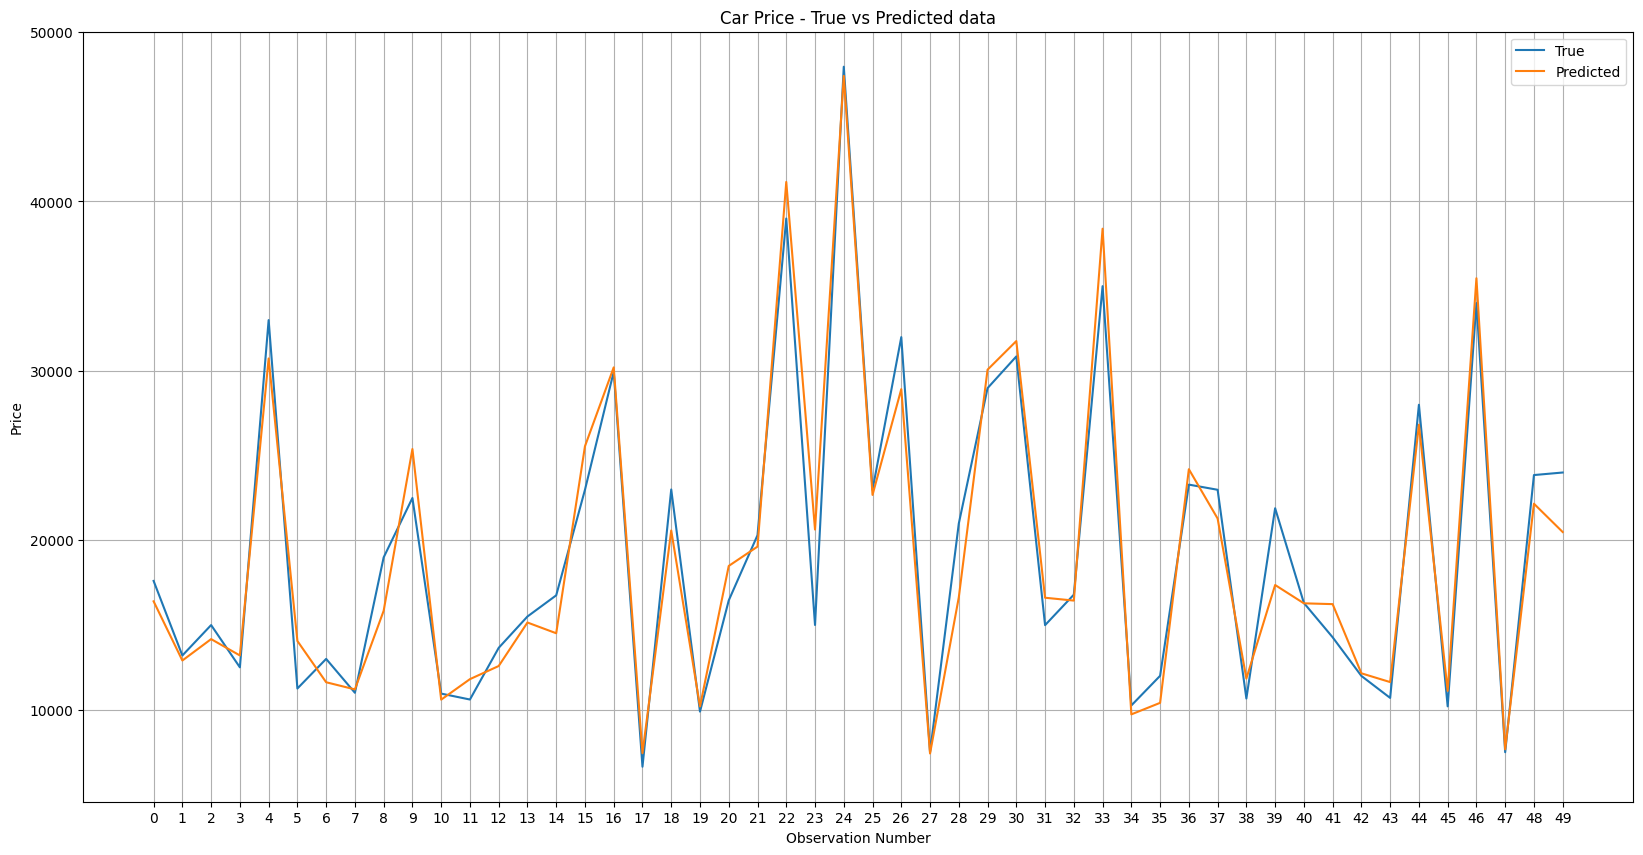

In [14]:
#Plotting prediction accuracy

y_pred = np.exp(model.predict(X_test_scaled))
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [15]:
#Pickling model
pickle.dump(model, open('model.pkl', 'wb'))